**INTRODUCTION**


As a team, we felt the best neighborhood should be one that is safe, fun, and has good education and income. Therefore, we used a dataset from the Pittsburgh police that recorded the total arrests in Pittsburgh from 2016 to present, another dataset on playground equipment in Pittsburgh from 2017 to present, and a dataset on education and income values.

 # Using Pittsburgh Police Arrest Data to Choose The Best Pittsburgh Neighborhood

I think the best metric to use to determine the best neighborhood based off of arrest reports is generating a percentage based off of the number of arrests and the population of a neighborhood. This percentage will be equivalent to the number of points a neighborhood receives and the neighborhood with fewer points is safer than those with more points (0.57% = 0.57 points). Alternatively, it is possible to put in place a metric where some crimes are worth more points than others (Assault = 5 points and Public Intoxication = 2 points). This system would be flawed in that I would be determining what crimes are more or less abhorrent than others. Since I do not have a law degree and there are hundreds of unique arrest possibilities, I chose to keep the metric simple by recording the number of arrests per neighborhood.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

arrest_reports = pd.read_csv("pittarrestsdata.csv") #read the dataset

unarray = arrest_reports['INCIDENTNEIGHBORHOOD'].unique() #number of unique neighborhoods = 99

print(unarray)
print("-------------------------------------------------------------------")
print("The number of unique neighborhoods: ", len(unarray))



['Bloomfield' 'Outside City' 'Westwood' 'East Allegheny' 'Crafton Heights'
 'Greenfield' 'Brookline' 'Regent Square' 'East Liberty' nan 'East Hills'
 'Carrick' 'Allegheny Center' 'South Side Flats' 'Sheraden'
 'East Carnegie' 'Golden Triangle/Civic Arena' 'Point Breeze North'
 'Perry South' 'Allentown' 'North Shore' 'Marshall-Shadeland'
 'Central Oakland' 'Middle Hill' 'Strip District'
 'Lincoln-Lemington-Belmar' 'Central Northside' 'Troy Hill-Herrs Island'
 'Highland Park' 'Homewood North' 'Northview Heights' 'Brighton Heights'
 'Hazelwood' 'Perry North' 'Bedford Dwellings' 'Elliott' 'Beechview'
 'Fineview' 'Glen Hazel' 'Spring Hill-City View' 'Bluff' 'Manchester'
 'Homewood West' 'Outside County' 'Point Breeze' 'Homewood South'
 'Squirrel Hill South' 'Terrace Village' 'Upper Lawrenceville' 'Arlington'
 'South Side Slopes' 'Lower Lawrenceville' 'Garfield' 'Lincoln Place'
 'Larimer' 'Mount Washington' 'California-Kirkbride' 'Banksville'
 'Bon Air' 'South Shore' 'Beltzhoover' 'Knoxville

## **The output from the code cell above will show us how many neighborhoods the Pittsburgh Police use to record arrests. There are 99 neighborhoods and each is listed above in an array.**

In [19]:
#all neighborhoods in dataset including duplicates
num_array = arrest_reports['INCIDENTNEIGHBORHOOD'] #grab every neighborhood including duplicates
arrest_counts = pd.Series(num_array).value_counts() #count the number of times a neighborhood appears
print(arrest_counts)

Central Business District    2904
South Side Flats             2429
Carrick                      1711
East Allegheny               1586
Homewood South               1563
                             ... 
Regent Square                  23
Central Northside              23
Mt. Oliver Boro                17
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


## **Using a series that includes every neighborhood including duplicates, we use the value_counts function to record how many times each neighborhood appears in the series. The top and bottom 5 neighborhoods in terms of number of arrests are listed above.**

Now this data is interesting, but is it actually useful?... Not really. The bottom five neighborhood might have fewer than 30 arrests because there could be only 100 people in the neighborhood. It is unfair to compare a neighborhood with 20,000 residents to another with 100. To make this data useful, we will need to find the population of the 10 neighborhoods listed above and form a percentage of residents arrested. For example, if Oakland has 100 residents and there were 10 arrests, then there is an arrest rate of 10%. After calculating these arrest rates, we will compare the ten neighborhoods to determine the safest and best.

- Central Business District: (2,886/**5,201**) * 100 =------------------------>55.49%
- South Side Flats: (2,421/**6,736**) * 100 =--------------------------------->35.94%
- Carrick: (1,699/**15,642**) * 100 =----------------------------------------->10.86%
- East Allegheny: (1,580/**2,136**) * 100 =----------------------------------->73.97%
- Homewood South: (1,558/**3,662**) * 100 =----------------------------------->42.55%

- Regent Square: (23/**4,067**) * 100 =--------------------------------------->0.57%
- Central Northside: (23/**2,959**) * 100 =----------------------------------->0.78%
- Mt. Oliver Boro and Mt. Oliver Neighborhood: (19/**3,324**) * 100 =--------->0.57%
- Troy Hill-Herrs Island: (6/**2,714**) * 100 =------------------------------->0.22%

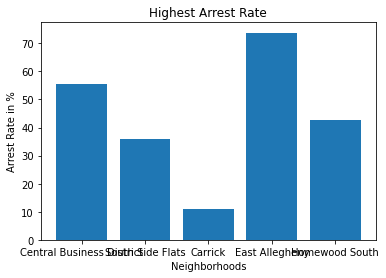

In [20]:
neighborhood = ['Central Business District', 'South Side Flats', 'Carrick', 'East Allegheny', 'Homewood South']
arrest_rate = [55.49, 35.94, 10.86, 73.79, 42.55]
plt.bar(neighborhood, arrest_rate)
plt.title('Highest Arrest Rate')
plt.xlabel('Neighborhoods')
plt.ylabel('Arrest Rate in %')
plt.show()

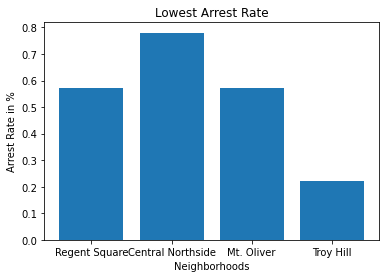

In [21]:
neighborhood2 = ['Regent Square', 'Central Northside', 'Mt. Oliver', 'Troy Hill']
arrests2 = [0.57, 0.78, 0.57, 0.22]
plt.bar(neighborhood2, arrests2)
plt.title('Lowest Arrest Rate')
plt.xlabel('Neighborhoods')
plt.ylabel('Arrest Rate in %')
plt.show()

# **------------------------------------------------------------------------------------------------------------**

# Playground Equipment

I've chosen to take a look at the amount of playground equipment in each neighborhood.

I feel that playground equipment can be used as a way to measure "bestness" of a neighborhood because more playground equipment correlates to more activities and opportunities for younger children.  

Rather than just accounting for number of playgrounds, I'm accounting for number of equipment to see how big and plentiful the playgrounds are. If there are different kinds of equipment in a certain neighborhood, the children that go to these playgrounds will have more things to enjoy.

The metric for this dataset will be very simple. Neighborhoods get a point for each piece of equipment that they have.

In [22]:
import pandas as pd

In [23]:
playgrounds = pd.read_csv("playgroundEquipment.csv")
playgrounds.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


In [24]:
playgrounds.groupby("neighborhood").count()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15,15,15
Allentown,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Banksville,6,6,6,6,6,6,0,0,6,6,6,6,6,6,6,6,6
Bedford Dwellings,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Beechview,21,21,21,21,14,21,16,21,21,21,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,5,5,5,4,4,5,2,5,5,5,5,5,5,5,5,5,5
West End,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
West Oakland,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


This data set contains 67 different neighborhoods. Now we will find out how many pieces of equipment are in each neighborhood.

In [25]:
playgrounds['neighborhood'].value_counts()

Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Bluff                   2
Westwood                2
East Carnegie           2
West Oakland            1
Strip District          1
Name: neighborhood, Length: 67, dtype: int64

<AxesSubplot:>

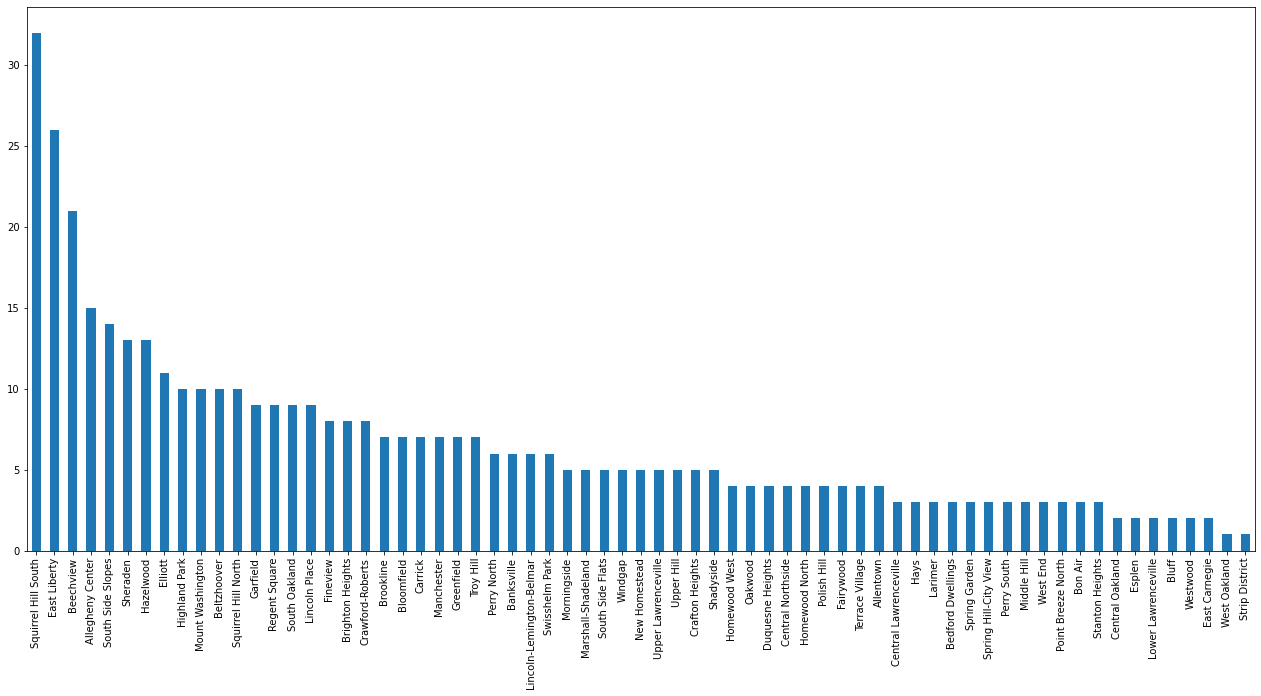

In [26]:
playgrounds['neighborhood'].value_counts().plot(kind="bar", width = .5, figsize=(22,10))

Here we can see each individual neighborhood and how much playground equipment it has.

You'll notice that **Squirrel Hill South, East Liberty, and Beechview** have very high numbers. After that, the number of equipment starts to fall more slowly and some neighborhoods even have the same amount. 

There are many neighborhoods at the bottom end with less than 5 pieces of equipment. Most notably, **West Oakland and Strip District** only have 1 piece of playground equipment.

So... just based off this dataset alone: ***Squirrel Hill South*** is the best neighborhood and ***West Oakland and Strip District*** are tied for the worst neighborhood.

# **------------------------------------------------------------------------------------------------------------**

# Education and Income

I looked at two factors: education and income. Personally, I think this would help me decide where I want to live because I want to be around well educated people that are smart with money.

In [28]:
import pandas as pd

bud = pd.read_csv("education-income.csv")
bud.head(10)

,Neighborhood,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
0,Allegheny Center,3,933,609,18.7%,44.5%,17.2%,15.8%,3.8%,"$16,964","$20,911","$22,535","$22,793",954,324,34.0%
1,Allegheny West,3,462,239,9.2%,28.9%,6.7%,44.8%,10.5%,"$26,638","$41,761","$35,386","$45,519",239,12,5.0%
2,Allentown,6,"2,500","1,729",23.0%,63.3%,6.6%,5.6%,1.5%,"$22,539","$29,274","$29,941","$31,909","2,212",630,28.5%
3,Arlington,7,"1,869","1,232",14.9%,65.3%,10.1%,7.1%,2.5%,"$27,167","$25,119","$36,089","$27,380","1,779",361,20.3%
4,Arlington Heights,7,244,166,18.1%,74.1%,0.0%,7.8%,0.0%,"$18,646","$9,417","$24,769","$10,265",293,169,57.7%
5,Banksville,5,"4,144","3,935",9.8%,51.5%,9.8%,22.3%,6.6%,"$38,555","$50,625","$51,217","$55,181","4,170",243,5.8%
6,Bedford Dwellings,15,"1,202",733,8.3%,49.9%,12.8%,14.2%,14.7%,"$8,955","$9,992","$11,896","$10,891","1,203",589,49.0%
7,Beechview,5,"7,974","5,211",11.0%,58.1%,11.1%,13.6%,6.2%,"$34,079","$36,602","$45,270","$39,896","7,450","1,366",18.3%
8,Beltzhoover,6,"1,925","1,369",19.3%,54.3%,13.8%,8.3%,4.2%,"$26,750","$33,869","$35,535","$36,917","2,066",485,23.5%
9,Bloomfield,12,"8,442","6,671",11.2%,42.6%,8.6%,24.1%,13.5%,"$23,831","$30,830","$31,658","$33,604","9,192","1,781",19.4%


**Median Income**

Outputs the DataFrame but sorted by Median Income.

In [29]:
amt = pd.read_csv("education-income.csv", index_col = "Neighborhood")
amtsrt = amt.sort_values(by = ["2009 Med. Income ('13 Dollars)"], ascending = False)
amtsrt.head(10)

,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
Neighborhood,,,,,,,,,,,,,,,
Point Breeze,10,"5,315","4,322",5.0%,23.2%,13.4%,25.9%,32.5%,"$71,548","$87,802","$95,044","$95,704","5,801",264,4.6%
Squirrel Hill North,10,"11,363","6,207",1.8%,14.1%,17.4%,26.7%,40.1%,"$64,740","$83,861","$86,001","$91,409","9,009",797,8.8%
New Homestead,8,990,923,10.1%,63.1%,10.9%,13.0%,2.9%,"$42,019","$83,167","$55,818","$90,652","1,360",115,8.5%
North Shore,16,303,196,5.6%,36.2%,24.0%,5.6%,28.6%,"$70,125","$82,650","$93,154","$90,089",229,0,0.0%
Regent Square,10,928,909,4.0%,24.1%,6.9%,21.0%,44.0%,"$54,450","$77,647","$72,331","$84,635","1,098",12,1.1%
Swisshelm Park,10,"1,361","1,110",8.6%,38.6%,14.9%,26.2%,11.8%,"$53,456","$72,500","$71,011","$79,025","1,404",30,2.1%
Strip District,13,616,443,8.4%,27.3%,12.4%,33.4%,18.5%,"$41,719","$64,868","$55,420","$70,706",469,10,2.1%
Highland Park,12,"6,395","5,041",6.6%,25.5%,12.1%,23.9%,31.8%,"$42,711","$61,455","$56,737","$66,985","6,782",621,9.2%
Ridgemont,4,483,444,9.7%,67.3%,5.2%,15.3%,2.5%,"$32,292","$56,250","$42,897","$61,313",465,39,8.4%


**Population Under Poverty**


The code below is supposed to output a plotly scatter plot of Population Under Poverty vs Population. However, it sometimes just outputs nothing, so I included a screenshot of what it looks like.

In [34]:
import plotly.express as px
import plotly.io as pio
import pandas as pd
amt = pd.read_csv("education-income.csv", index_col = "Neighborhood")

amtsrt = amt.sort_values(by=['Est. Percent Under Poverty (2010)'], ascending=False)

spt = px.scatter(amtsrt, x = "Est. Pop. Under Poverty (2010)", y = "Population (2010)")
pio.renderers.default='notebook'
spt.show("notebook")

ModuleNotFoundError: No module named 'plotly'

In [31]:
from IPython.display import Image
Image("Screenshot (6).png")

FileNotFoundError: No such file or directory: 'Screenshot (6).png'

FileNotFoundError: No such file or directory: 'Screenshot (6).png'

<IPython.core.display.Image object>

Looking at the data, Regent Square looks like my choice. Of the top ten Median Income neighborhoods, it had one of the lowest Population under Poverty percentages and one of the highest populations. 

# **---------------------------------------------------------------------------------------------------------**

# **THE RESULTS**

When forming a final metric, we felt it was best to have the arrest data take priority because if you are not safe, then you cannot have fun. So, if we take the points from the 4 neighborhoods with the lowest arrest rate and subtract those points from their playground points, then we can determine the best Pittsburgh neighborhood. Remember, we are subtracting the arrest points because the lower the points, the better! Ultimately, the neighborhood with the most final points will be the best!

- Regent Square: 8 playground points - 0.57 arrest points = 7.43 Total points
- Central Northside: 5 playground points - 0.78 arrest points = 4.22 Total points
- Mt. Oliver: 0 playground points - 0.57 arrest points = 0.57 Total points
- Troy Hill: 7 playground points - 0.22 arrest points = 6.78 Total points

**BASED ON THE DATA ABOVE, REGENT SQUARE IS THE BEST NEIGHBORHOOD IN PITTSBURGH**

Regent Square being the best neighborhood also follows suit with the third dataset since it was of the top ten median income neighborhoods and had one of the lowest population under poverty percentages.

## Conclusions:

**Andrew**:

**Camden**: Even though I've lived in Pittsburgh all my life, I don't really know lots about the neighborhoods so I wasn't really sure what to expect. I don't know anything about Regent Square, but it must be a pretty good neighborhood since all of our datasets pointed to it being one of the top neighborhoods. Regent Square wasn't on the very high end of my playgrounds graph, but it was on the better side and once I saw through the arrests data set that Regent Square was on the better end again, I was confident that it would arrive at being our best neighborhood.

**Carter**: